# North america change in temperature

In this project, I decide to make a comparison in North America to check the $CO_2$ emittions and the temperature change between the years. In particular, I'm gonna work with *United States, Canada* and *Mexico*. I'm gonna check how many $CO_2$ produce every country from 1960 until now, and also check the average temperature.

First, I need to open the datasets.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jupyterthemes as jtplot
import matplotlib.animation as animation
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [18]:
data1=pd.read_csv('temperature.csv',skiprows=4)
data2=pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_1927797.csv',skiprows=3)
data3=pd.read_csv('mexico.csv',header=None,skiprows=1)
data4=pd.read_csv('canada.csv',header=None,skiprows=1)

usa_temp=pd.DataFrame(data1)
CO2=pd.DataFrame(data2)
mexico_temp=pd.DataFrame(data3)
canada_temp=pd.DataFrame(data4)

min_year=1960

Work with the first data set. The *USA* temperature. Let's check the data

In [19]:
usa_temp.head()

,Date,Value,Anomaly
0,196012,51.44,-0.58
1,196112,51.87,-0.15
2,196212,51.90,-0.12
3,196312,52.26,0.24
4,196412,51.67,-0.35


The best thing I can do it's to change the name of the columns and also quit the column *Anomaly*, that because isn't work for my analysis.

In [20]:
usa_temp=usa_temp.rename(columns={'Date':'Year',
                                  'Value':'Temperature'}).drop(columns='Anomaly')
def celsius_to_fah(x):
    return (x*(9/5))+32

def fah_to_celsius(x):
    return (x-32)*(5/9)

for i in range(len(usa_temp)):
    usa_temp['Year'][i]=min_year+i
    usa_temp['Temperature'][i]=fah_to_celsius(usa_temp['Temperature'][i])
usa_temp.head()

ipykernel_launcher:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Temperature
0,1960,10.800000
1,1961,11.038889
2,1962,11.055556
3,1963,11.255556
4,1964,10.927778


I want the change of the temperature, I mean i want the $dT$. This differential it can be calculated by $dT=T_i-T_0$, where $T_i$ is the actual temperature and $T_0$ is the initial temperature, at the year 1960. I'm going to create a new column with this $dT$

In [21]:
dT=[]
#dT.append(0)
T0=usa_temp['Temperature'][0]
for i in range(1,len(usa_temp)):
    dT.append(usa_temp['Temperature'][i]-T0)

usa_temp=usa_temp.join(pd.DataFrame({'dT':dT}))
usa_temp.head()

,Year,Temperature,dT
0,1960,10.800000,0.238889
1,1961,11.038889,0.255556
2,1962,11.055556,0.455556
3,1963,11.255556,0.127778
4,1964,10.927778,0.138889


Now, It's time to work with the data from Mexico.

In [22]:
mexico_temp=mexico_temp.rename(columns={0:'Temperature',1:'Year',
                                        2:'Statistics',3:'Country',4:'ISO3'})
mexico_temp.head()

,Temperature,Year,Statistics,Country,ISO3
0,15.5146,1901,Jan Average,Mexico,MEX
1,15.3109,1901,Feb Average,Mexico,MEX
2,17.8516,1901,Mar Average,Mexico,MEX
3,19.6372,1901,Apr Average,Mexico,MEX
4,22.5504,1901,May Average,Mexico,MEX


In [23]:
mexico_temp=mexico_temp.drop(columns={'Statistics','Country','ISO3'})
mexico_temp=mexico_temp.where(mexico_temp['Year']>=min_year).dropna()
mexico_temp=mexico_temp.groupby('Year').mean().reset_index()
mexico_temp['Year']=mexico_temp['Year'].astype('int')

#I'm also add the dT column.
dT=[]
#dT.append(0)
T0=mexico_temp['Temperature'][0]
for i in range(len(mexico_temp)):
    dT.append(mexico_temp['Temperature'][i]-T0)
mexico_temp=mexico_temp.join(pd.DataFrame({'dT':dT}))
mexico_temp.head()

,Year,Temperature,dT
0,1960,20.508975,0.000000
1,1961,20.491925,-0.017050
2,1962,20.838025,0.329050
3,1963,20.683475,0.174500
4,1964,20.353383,-0.155592


Now, it's time to clean the Canada data.

In [24]:
canada_temp.head()

,0,1,2,3,4
0,-25.38500,1901,Jan Average,Canada,CAN
1,-23.71900,1901,Feb Average,Canada,CAN
2,-18.93400,1901,Mar Average,Canada,CAN
3,-9.96430,1901,Apr Average,Canada,CAN
4,0.02289,1901,May Average,Canada,CAN


In [25]:
canada_temp=canada_temp.rename(columns={0:'Temperature',1:'Year',2:'Statistics',
                                        3:'Country',4:'ISO3'})
canada_temp.head()

,Temperature,Year,Statistics,Country,ISO3
0,-25.38500,1901,Jan Average,Canada,CAN
1,-23.71900,1901,Feb Average,Canada,CAN
2,-18.93400,1901,Mar Average,Canada,CAN
3,-9.96430,1901,Apr Average,Canada,CAN
4,0.02289,1901,May Average,Canada,CAN


In [26]:
canada_temp=canada_temp.drop(columns={'Statistics','Country','ISO3'})
canada_temp=canada_temp.where(canada_temp['Year']>=min_year).dropna()
canada_temp=canada_temp.groupby('Year').mean().reset_index()
canada_temp['Year']=canada_temp['Year'].astype('int')
#I'm also add the dT column.
dT=[]
#dT.append(0)
T0=canada_temp['Temperature'][0]
for i in range(len(canada_temp)):
    dT.append(canada_temp['Temperature'][i]-T0)
canada_temp=canada_temp.join(pd.DataFrame({'dT':dT}))
canada_temp.head()

,Year,Temperature,dT
0,1960,-6.490800,0.000000
1,1961,-7.390573,-0.899773
2,1962,-6.976667,-0.485867
3,1963,-6.792632,-0.301832
4,1964,-7.679682,-1.188882


And for last, it's time to clean the CO2 data from every coutry.

In [27]:
#Check the data
CO2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203957,...,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN,NaN,NaN


In [28]:
#For USA
usa_co2=CO2.where(CO2['Country Code']=='USA').dropna(how='all')
usa_co2=usa_co2.iloc[:,4:61]

#For Mexico
mexico_co2=CO2.where(CO2['Country Code']=='MEX').dropna(how='all')
mexico_co2=mexico_co2.iloc[:,4:61]

#For Canada
canada_co2=CO2.where(CO2['Country Code']=='CAN').dropna(how='all')
canada_co2=canada_co2.iloc[:,4:61]

#I can make just one dataFrame with all the past CO2 emissions.
years=[]; usa_data=[]; mex_data=[]; can_data=[]
for i in range(len(usa_temp)):
    years.append(min_year+i)
    usa_data.append(usa_co2.iloc[0,i])
    mex_data.append(mexico_co2.iloc[0,i])
    can_data.append(canada_co2.iloc[0,i])

co2_emission=pd.DataFrame({'Year':years,
                           'USA':usa_data,
                           'Mexico':mex_data,
                           'Canada':can_data})
co2_emission.head()

,Year,USA,Mexico,Canada
0,1960,15.999779,1.670990,10.770847
1,1961,15.681256,1.675961,10.627898
2,1962,16.013937,1.587485,11.130627
3,1963,16.482762,1.600528,11.132102
4,1964,16.968119,1.736658,12.305370


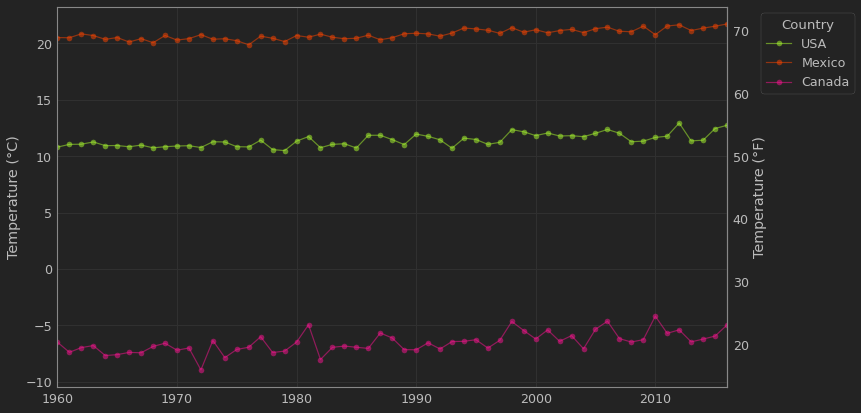

In [29]:
fig,axs=plt.subplots(1,figsize=(12,7))
#For USA
plt.plot(years,usa_temp['Temperature'],
            color='greenyellow',alpha=0.5,marker='o',label='USA')
#For Mexico
plt.plot(years,mexico_temp['Temperature'],
            color='orangered',alpha=0.5,marker='o',label='Mexico')
#For Canada
plt.plot(years,canada_temp['Temperature'],
            color='deeppink',alpha=0.5,marker='o',label='Canada')
plt.xlim(years[0],years[len(usa_temp)-1])
plt.ylabel('Temperature (°C)')
second_axis = axs.secondary_yaxis('right', functions=(celsius_to_fah,fah_to_celsius))
second_axis.set_ylabel('Temperature (°F)')
plt.legend(title='Country',loc='upper right',bbox_to_anchor=(1.2, 1.0))

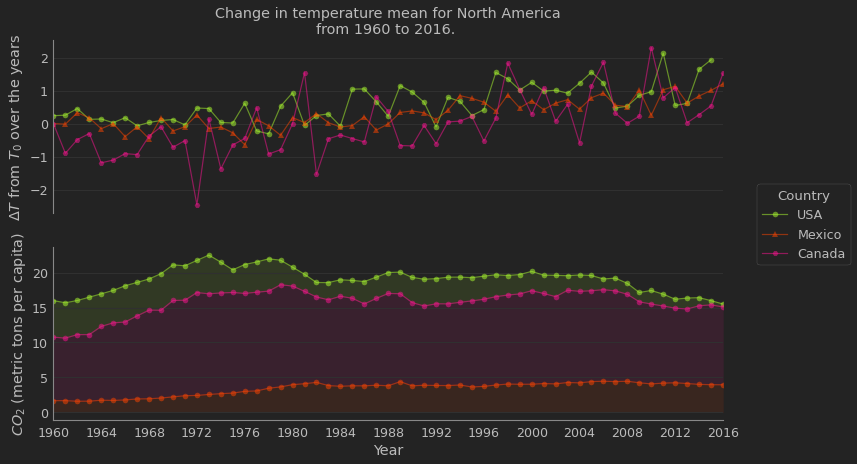

In [30]:
figure,axs=plt.subplots(2,figsize=(12,7),sharex=True)
axs[0].set_title('''Change in temperature mean for North America
from 1960 to 2016. ''')
#For USA
axs[0].plot(years,usa_temp['dT'],
            color='greenyellow',alpha=0.5,marker='o',label='USA')
#For Mexico
axs[0].plot(years,mexico_temp['dT'],
            color='orangered',alpha=0.5,marker='^',label='Mexico')
#For Canada
axs[0].plot(years,canada_temp['dT'],
            color='deeppink',alpha=0.5,marker='H',label='Canada')
axs[0].set_xlim(years[0],years[len(usa_temp)-1])
axs[0].set_ylabel('$\Delta T$ from $T_0$ over the years')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].grid(axis='x')
#Second plot
#For USA
axs[1].plot(years,
            co2_emission['USA'],color='greenyellow',alpha=0.5,marker='o')
axs[1].fill_between(years,co2_emission['Canada'],co2_emission['USA'],
                    color='greenyellow',alpha=0.1,interpolate=True)
#For Mexico
axs[1].plot(years,
            co2_emission['Mexico'],color='orangered',alpha=0.5,marker='o')
axs[1].fill_between(years,co2_emission['Mexico'],
                    color='orangered',alpha=0.1,interpolate=True)
#For Canada
axs[1].plot(years,
            co2_emission['Canada'],color='deeppink',alpha=0.5,marker='o')
axs[1].fill_between(years,co2_emission['Mexico'],co2_emission['Canada'],
                    color='deeppink',alpha=0.1,interpolate=True)
axs[1].set_ylabel('$CO_2$ (metric tons per capita)')
axs[1].set_xlabel('Year')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
#axs[1].set_xlim(0,co2_emission['USA'].max())
axs[1].grid(axis='x')
axs[1].xaxis.set_major_locator(plt.MaxNLocator(14))
axs[0].legend(title='Country',loc='upper right',bbox_to_anchor=(1.2, 0.2))